# 🚢 Digit Recognizer - Neural Network Learning Journey

**Learning neural networks through the classic MNIST handwritten digit recognition challenge**

---

## 🎯 Learning Objectives

By the end of this notebook, you will:
- Understand how neural networks work from the ground up
- Implement a neural network from scratch using PyTorch
- Learn about forward propagation, backpropagation, and gradient descent
- Train your first deep learning model
- Evaluate model performance and make predictions

---

## 📋 Project Structure

This notebook is organized into learning phases:
1. **Environment Setup** - Import libraries and check setup
2. **Data Exploration** - Load and understand the MNIST dataset
3. **Neural Network Basics** - Learn the theory and implement from scratch
4. **Training Pipeline** - Build the training loop and optimization
5. **Model Evaluation** - Test performance and analyze results
6. **Kaggle Submission** - Generate predictions for competition

---


## Phase 1: Environment Setup 🔧

Let's start by importing all the necessary libraries and checking our environment.


In [19]:
# TODO: Import the following libraries
# - pandas (for data manipulation)
# - numpy (for numerical operations)
# - matplotlib.pyplot (for plotting)
# - seaborn (for statistical visualizations)
# - torch (PyTorch for neural networks)
# - torch.nn (neural network modules)
# - torch.optim (optimizers)
# - torch.nn.functional (activation functions)
# - sklearn.model_selection (for train/test split)
# - sklearn.metrics (for evaluation metrics)


# HINT: Use import statements like:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# etc.

# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
# TODO: Check your PyTorch version and device availability
# Print the PyTorch version
# Check if CUDA is available (for GPU training)
# Set the device to use (CPU or GPU)

# HINT: Use torch.__version__ and torch.cuda.is_available()
# Set device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# YOUR CODE HERE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Phase 2: Data Exploration 📊

Now let's load and explore the MNIST dataset. The MNIST dataset contains 70,000 images of handwritten digits (0-9), each 28x28 pixels.


In [21]:
# TODO: Load the training data
# Read the train.csv file from the data/ directory
# Display basic information about the dataset
# Show the first few rows

# HINT: Use pd.read_csv('data/train.csv')
# Use .info(), .head(), .shape to explore the data

# YOUR CODE HERE
df = pd.read_csv("../data/train.csv")
print(df.head())
print("Shape of the dataset:", df.shape)
print()
print("Information about the dataset:", df.info())
print("Description about the dataset:", df.describe())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [27]:
# TODO: Separate features and labels
# The first column is 'label' (the digit 0-9)
# The remaining 784 columns are pixel values (28x28 = 784)
# Create X (features) and y (labels) variables

# HINT: Use .iloc[:, 1:] for features and .iloc[:, 0] for labels
# Convert to numpy arrays using .values

# YOUR CODE HERE
y = df["label"]
print("Head of labels, firt 5 rows:", y.head(5))
print()
print("Now creating the X (features)...")
print()
X = df.drop(["label"], axis=1)
print("First five rows of:")
print(X.head(5))
print()
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

# Convert to NumPy arrays
X = X.values  # or X.to_numpy()
y = y.values  # or y.to_numpy()

print()
print("After converting to NumPy:")
print("Type of X:", type(X))
print("Type of y:", type(y))



Head of labels, firt 5 rows: 0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Now creating the X (features)...

First five rows of:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4 

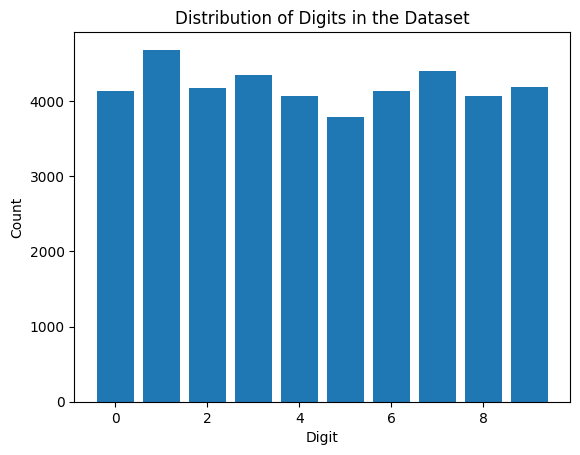

In [30]:
# TODO: Explore the data distribution
# Count how many samples we have for each digit (0-9)
# Create a bar plot showing the distribution
# Check if the dataset is balanced

# HINT: Use pd.Series(y).value_counts().sort_index()
# Use plt.bar() or sns.countplot() for visualization

# YOUR CODE HERE
counts = pd.Series(y).value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in the Dataset")
plt.show()

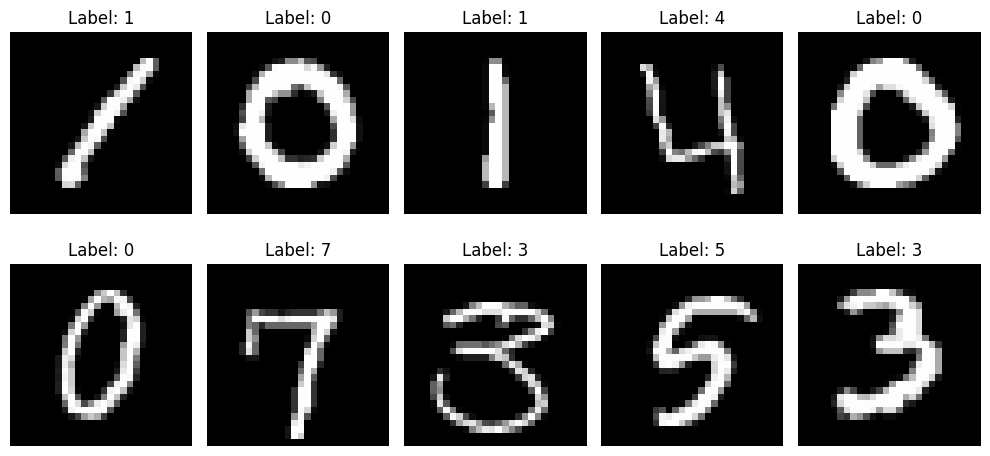

In [ ]:
# Visualize the first 10 sample images in a 2x5 grid

# The images come from the MNIST dataset, which is loaded into the DataFrame 'df'.
# After dropping the 'label' column, the remaining columns in 'X' represent the pixel values (flattened 28x28 images).
# Each row in 'X' is a single image, with 784 pixel values (0-255).
# Here, we reshape each row back to 28x28 to display the original handwritten digit.

plt.figure(figsize=(10, 5))
for i in range(10):
    img = X[i].reshape(28, 28)  # Reshape the flattened image back to 28x28 pixels
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [32]:
# Pick one image
sample_image = X[0]
print("Flat array (first 28 pixels):", sample_image[:28])
print()

# Reshape it
reshaped = sample_image.reshape(28, 28)
print("Reshaped (first row of the image):")
print(reshaped[0])  # First row of pixels
print()
print("Middle row (where digit likely is):")
print(reshaped[14])  # Middle row - usually has the digit

Flat array (first 28 pixels): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Reshaped (first row of the image):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Middle row (where digit likely is):
[  0   0   0   0   0   0   0   0   0   0   0  20 206 254 254 198   7   0
   0   0   0   0   0   0   0   0   0   0]


## Phase 3: Data Preprocessing 🔄

Before training our neural network, we need to prepare the data properly.


In [7]:
# TODO: Normalize the pixel values
# Pixel values are currently 0-255, we need to scale them to 0-1
# This helps the neural network train more effectively

# HINT: Divide X by 255.0 to normalize
# Check the min and max values after normalization

# YOUR CODE HERE


In [8]:
# TODO: Split the data into training and validation sets
# Use 80% for training and 20% for validation
# Use random_state=42 for reproducibility

# HINT: Use train_test_split from sklearn.model_selection
# X_train, X_val, y_train, y_val = train_test_split(...)

# YOUR CODE HERE


In [9]:
# TODO: Convert to PyTorch tensors
# Convert numpy arrays to PyTorch tensors
# Convert data type to float32 for features
# Convert labels to long type (int64)

# HINT: Use torch.from_numpy() and .float() or .long()
# Move tensors to the device (CPU or GPU)

# YOUR CODE HERE


## Phase 4: Neural Network Theory 🧠

Before we implement our neural network, let's understand the key concepts:

### What is a Neural Network?
A neural network is inspired by how the human brain works. It consists of:
- **Input Layer**: Receives the data (784 pixels for MNIST)
- **Hidden Layers**: Process the information (we'll use 2 hidden layers)
- **Output Layer**: Produces the final prediction (10 classes for digits 0-9)

### Key Components:
1. **Weights and Biases**: Parameters that the network learns
2. **Activation Functions**: Add non-linearity (ReLU, Softmax)
3. **Forward Propagation**: Data flows from input to output
4. **Loss Function**: Measures how wrong our predictions are
5. **Backpropagation**: Updates weights based on the error
6. **Optimizer**: Decides how to update the weights (Adam, SGD)

### Our Architecture:
- Input: 784 features (28×28 pixels)
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2: 64 neurons with ReLU activation
- Output Layer: 10 neurons (one for each digit) with Softmax activation


## Phase 5: Neural Network Implementation 🏗️

Now let's build our neural network step by step.


In [10]:
# TODO: Define the neural network architecture
# Create a class that inherits from torch.nn.Module
# Define the layers in __init__ method:
#   - Linear layer: 784 -> 128 (input to first hidden)
#   - Linear layer: 128 -> 64 (first hidden to second hidden)
#   - Linear layer: 64 -> 10 (second hidden to output)
# Define forward method with ReLU activations between layers
# Use softmax on the final output

# HINT: Use torch.nn.Linear() for layers
# Use torch.nn.functional.relu() and torch.nn.functional.softmax()
# Don't forget to call super().__init__()

class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        # YOUR CODE HERE
        
    def forward(self, x):
        # YOUR CODE HERE
        pass


NameError: name 'nn' is not defined

In [ ]:
# TODO: Initialize the model
# Create an instance of your DigitClassifier
# Move the model to the device (CPU or GPU)
# Print the model architecture

# HINT: model = DigitClassifier().to(device)
# Use print(model) to see the architecture

# YOUR CODE HERE


In [ ]:
# TODO: Define loss function and optimizer
# Use CrossEntropyLoss (combines softmax and negative log-likelihood)
# Use Adam optimizer with learning rate 0.001

# HINT: criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# YOUR CODE HERE


## Phase 6: Training Pipeline 🚂

Now comes the exciting part - training our neural network!


In [ ]:
# TODO: Create data loaders for batching
# Create TensorDataset from your training and validation tensors
# Create DataLoader with batch_size=64 for training
# Create DataLoader with batch_size=64 for validation
# Set shuffle=True for training data

# HINT: Use torch.utils.data.TensorDataset and DataLoader
# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# YOUR CODE HERE


In [ ]:
# TODO: Implement the training loop
# Set number of epochs (start with 10)
# Create lists to track training and validation losses
# Create lists to track training and validation accuracies

# For each epoch:
#   1. Set model to training mode
#   2. Initialize running loss and correct predictions
#   3. For each batch in training data:
#      - Zero the gradients
#      - Forward pass
#      - Calculate loss
#      - Backward pass (backpropagation)
#      - Update weights
#      - Track loss and accuracy
#   4. Calculate average training loss and accuracy
#   5. Evaluate on validation set (similar process but no gradient updates)
#   6. Print progress every epoch

# HINT: Use model.train() and model.eval()
# Use torch.no_grad() for validation
# Use optimizer.zero_grad(), loss.backward(), optimizer.step()

num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    # YOUR CODE HERE
    
    # Validation phase
    # YOUR CODE HERE
    
    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    print('-' * 50)


## 🎉 Congratulations! 🎉

You've successfully:
- ✅ Built your first neural network from scratch
- ✅ Learned about forward propagation and backpropagation
- ✅ Trained a model to recognize handwritten digits
- ✅ Evaluated your model's performance
- ✅ Created predictions for the Kaggle competition

### 🚀 Next Steps:
1. **Submit to Kaggle**: Upload your `submission.csv` to the competition
2. **Experiment**: Try different architectures, learning rates, or optimizers
3. **Learn More**: Explore convolutional neural networks (CNNs) for better performance
4. **Share**: Update your README with results and insights

### 📚 What You Learned:
- Neural network architecture and components
- PyTorch framework for deep learning
- Training loops and optimization
- Model evaluation and visualization
- Computer vision preprocessing techniques

**Great job on completing your first neural network project!** 🎊


---

## 📝 Learning Notes

Use this section to jot down your thoughts, insights, and questions as you work through the notebook:

### Key Insights:
- 
- 
- 

### Questions to Explore:
- 
- 
- 

### Future Improvements:
- 
- 
- 
